#TASK 1

In [ ]:
#importing the necessary libraries
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

##Loading and normalizing the data

In [ ]:
#loading the 2D data from the mat files and returning the training and testing values
def load_data():

    train_class0 = scipy.io.loadmat("train_class0.mat")["x"]
    train_class1 = scipy.io.loadmat("train_class1.mat")["x"]
    test_class0 = scipy.io.loadmat("test_class0.mat")["x"]
    test_class1 = scipy.io.loadmat("test_class1.mat")["x"]

    #splitting the data into training and validation sets by performing a 75-25 split
    #we have used vstack to stack the two class data vertically into the same list
    X_train = np.vstack([train_class0[:1500], train_class1[:1500]])
    y_train = np.vstack([np.zeros((1500, 1)), np.ones((1500, 1))])

    #remaining 500 values are used as validation data
    X_val = np.vstack([train_class0[1500:], train_class1[1500:]])
    y_val = np.vstack([np.zeros((500, 1)), np.ones((500, 1))])

    #next we combine 1000 test samples from each class into a single testing data
    X_test = np.vstack([test_class0, test_class1])
    y_test = np.vstack([np.zeros((1000, 1)), np.ones((1000, 1))])

    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
#normalizing the input variable
def normalize_data(X_train, X_val, X_test):

    mean = X_train.mean(axis=0)     #calculating the mean
    standard_deviation = X_train.std(axis=0)   #calculating the standard deviation
    X_train_norm = (X_train - mean) / standard_deviation
    X_val_norm = (X_val - mean) / standard_deviation
    X_test_norm = (X_test - mean) / standard_deviation

    return X_train_norm, X_val_norm, X_test_norm

##Designing the MLP

In [ ]:
#defining the activation function (sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [ ]:
#initializing the weights and bias
def initialize_weights(input_size, hidden_size, output_size):

    np.random.seed(42)
    wt1 = np.random.randn(input_size, hidden_size) * 0.01
    bias1 = np.zeros((1, hidden_size))
    wt2 = np.random.randn(hidden_size, output_size) * 0.01
    bias2 = np.zeros((1, output_size))

    return wt1, bias1, wt2, bias2

In [ ]:
#initializing forward passing
def forward_pass(X, W1, b1, W2, b2):

    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    return Z1, A1, Z2, A2

In [ ]:
#initializing back propagation
def backpropagation(X, Y, Z1, A1, Z2, A2, W1, W2):

    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2


In [ ]:
#defining the training Function
def train(X_train, y_train, X_val, y_val, nH, learning_rate=2, max_epochs=1000):

    input_size = X_train.shape[1]
    output_size = 1
    W1, b1, W2, b2 = initialize_weights(input_size, nH, output_size)

    train_losses, val_losses = [], []

    for epoch in range(max_epochs):

        #starting the forward pass
        Z1_train, A1_train, Z2_train, A2_train = forward_pass(X_train, W1, b1, W2, b2)

        train_loss = np.mean((A2_train - y_train) ** 2)
        train_losses.append(train_loss)

        #calculating the validation loss
        Z1_val, A1_val, Z2_val, A2_val = forward_pass(X_val, W1, b1, W2, b2)
        val_loss = np.mean((A2_val - y_val) ** 2)
        val_losses.append(val_loss)

        #we stop the program if validation loss increases
        if epoch > 10 and val_losses[-1] > val_losses[-2]:
            break

        #now we start the backpropagation
        dW1, db1, dW2, db2 = backpropagation(X_train, y_train, Z1_train, A1_train, Z2_train, A2_train, W1, W2)

        #we keep updating the weights
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    return W1, b1, W2, b2, train_losses, val_losses

In [ ]:
#defining the testing Function
def test(X_test, y_test, W1, b1, W2, b2):

    _, _, _, A2 = forward_pass(X_test, W1, b1, W2, b2)
    predictions = (A2 > 0.5).astype(int).flatten()
    accuracy = np.mean(predictions == y_test.flatten())

    return accuracy

##Main: Putting it all together

For this iteration we are training with nH=2...


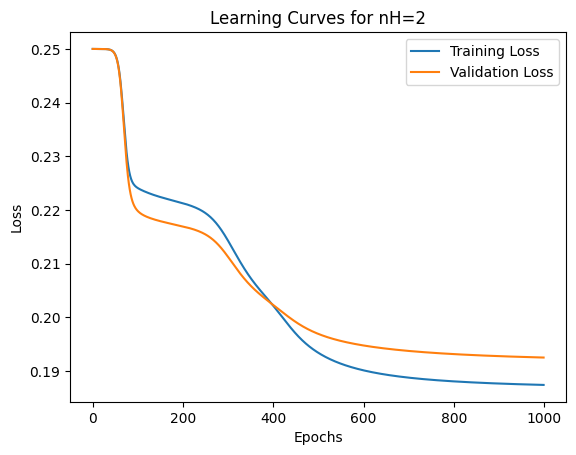

For this iteration we are training with nH=4...


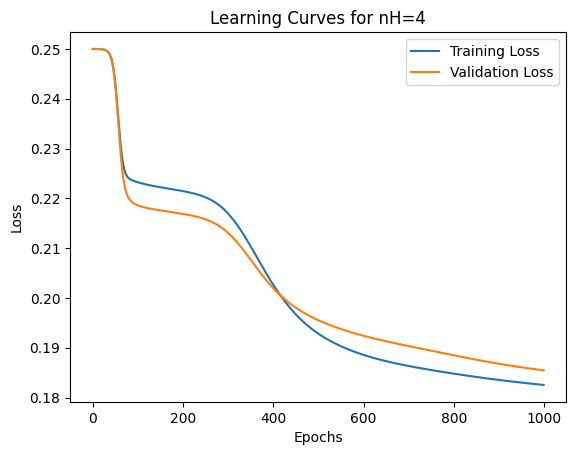

For this iteration we are training with nH=6...


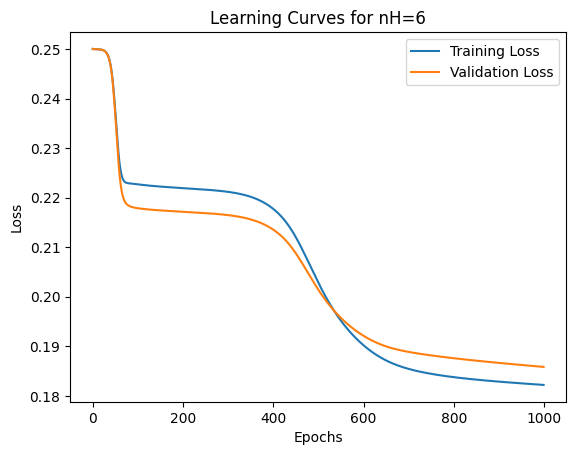

For this iteration we are training with nH=8...


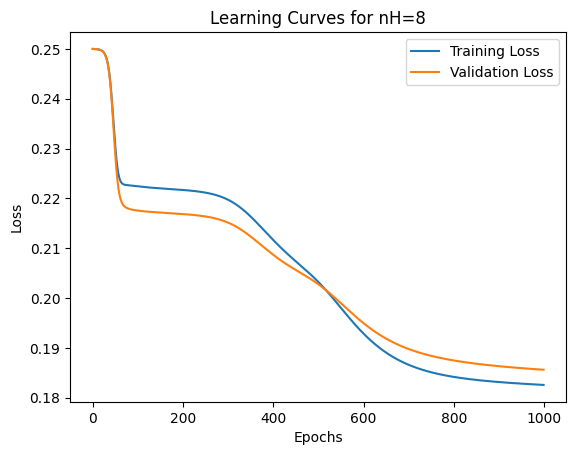

For this iteration we are training with nH=10...


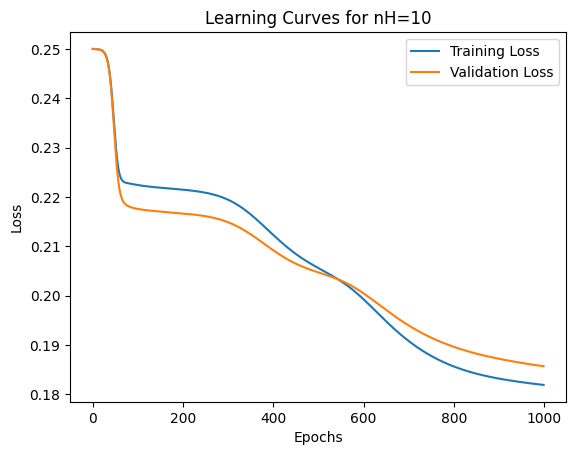

Out of all the nH, the value with the best accuracy is nH = 8 with accuracy: 0.728


In [ ]:
#defining the main function

def main():

    # Load and preprocess data
    X_train, y_train, X_val, y_val, X_test, y_test = load_data()
    X_train, X_val, X_test = normalize_data(X_train, X_val, X_test)

    nH_values = [2, 4, 6, 8, 10]        #different values of nH to test with
    results = {}

    for nH in nH_values:

        print(f"For this iteration we are training with nH={nH}...")
        W1, b1, W2, b2, train_losses, val_losses = train(X_train, y_train, X_val, y_val, nH)
        accuracy = test(X_test, y_test, W1, b1, W2, b2)
        results[nH] = accuracy

        # Plot learning curves
        plt.plot(train_losses, label="Training Loss")
        plt.plot(val_losses, label="Validation Loss")
        plt.title(f"Learning Curves for nH={nH}")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    # Report best nH
    # print(f"results:", results)
    best_nH = max(results, key=results.get)
    print(f"Out of all the nH, the value with the best accuracy is nH = {best_nH} with accuracy: {results[best_nH]}")

if __name__ == "__main__":
    main()

#TASK 2

In [ ]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Flatten, Dense, Activation)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical     #for one-hot encoding

#making sure what GPU is being used. This is necessary since this task is computationally expensive.
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


##Loading, normalizing and one-hot encoding the data

In [ ]:
#loading the CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#normalizing the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#one-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##Creating the model

In [ ]:
def create_model(kernel_size_first_layer=(3, 3), use_batch_norm=True):

    model = Sequential()

    #adding the first convolutional Block
    model.add(Conv2D(32, kernel_size_first_layer, padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))

    if use_batch_norm:

        model.add(BatchNormalization())

    #adding the second Convolutional Block
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))

    if use_batch_norm:

        model.add(BatchNormalization())

    # Max Pooling + Dropout
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Third Convolutional Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))

    if use_batch_norm:

        model.add(BatchNormalization())

    # Fourth Convolutional Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))

    if use_batch_norm:

        model.add(BatchNormalization())

    # Max Pooling + Dropout
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Fifth Convolutional Block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))

    if use_batch_norm:

        model.add(BatchNormalization())

    # Sixth Convolutional Block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))

    if use_batch_norm:

        model.add(BatchNormalization())

    # Max Pooling + Dropout
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    return model

##Training and Evaluating the model

In [ ]:
def train_and_evaluate(model, learning_rate=0.001, batch_size=32, epochs=20):

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(X_test, y_test), verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy

##Performing the experiment

In [ ]:
# Performing experiment 1: Baseline model
print("Baseline Model")
model = create_model()
baseline_accuracy = train_and_evaluate(model)

# Performing experiment 2: Change learning rate to 0.05
print("\nExperiment 2: Learning Rate 0.05")
model = create_model()
accuracy_learning_rate_0_05 = train_and_evaluate(model, learning_rate=0.05)

# Performing experiment 3: Change learning rate to 0.0001
print("\nExperiment 3: Learning Rate 0.0001")
model = create_model()
accuracy_learning_rate_0_0001 = train_and_evaluate(model, learning_rate=0.0001)

# Performing experiment 4: Change kernel size for first layer to 7x7
print("\nExperiment 4: Kernel Size 7x7")
model = create_model(kernel_size_first_layer=(7, 7))
kernel_7x7_accuracy = train_and_evaluate(model)

# Performing experiment 5: Remove all batch normalization layers
print("\nExperiment 5: No Batch Normalization")
model = create_model(use_batch_norm=False)
no_batch_norm_accuracy = train_and_evaluate(model)

# Performing experiment 6: Change batch size to 16
print("\nExperiment 6: Batch Size 16")
model = create_model()
batch_size_16_accuracy = train_and_evaluate(model, batch_size=16)

# Performing experiment 7: Change batch size to 256
print("\nExperiment 7: Batch Size 256")
model = create_model()
batch_size_256_accuracy = train_and_evaluate(model, batch_size=256)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Learning Rate 0.05 Accuracy: {accuracy_learning_rate_0_05:.4f}")
print(f"Learning Rate 0.0001 Accuracy: {accuracy_learning_rate_0_0001:.4f}")
print(f"Kernel Size 7x7 Accuracy: {kernel_7x7_accuracy:.4f}")
print(f"No Batch Normalization Accuracy: {no_batch_norm_accuracy:.4f}")
print(f"Batch Size 16 Accuracy: {batch_size_16_accuracy:.4f}")
print(f"Batch Size 256 Accuracy: {batch_size_256_accuracy:.4f}")


Baseline Model
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.3792 - loss: 2.2063 - val_accuracy: 0.5545 - val_loss: 1.2651
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.6285 - loss: 1.0875 - val_accuracy: 0.6856 - val_loss: 0.9258
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7108 - loss: 0.8358 - val_accuracy: 0.7090 - val_loss: 0.8530
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7542 - loss: 0.7091 - val_accuracy: 0.7708 - val_loss: 0.6637
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7770 - loss: 0.6391 - val_accuracy: 0.7965 - val_loss: 0.5927
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8036 - loss: 0.5690 - val_accuracy: 0.7924 - val_loss: 0.6161
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8188 - loss: 0.5216 - val_accuracy: 0.7947 - val_loss: 0.6082
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8